# Pandas
---
Per the Pandas website:
Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Pandas is built on top of NumPy and provides efficient use of dataframes (i.e. multi-dimesional arrays with row and col labels)

All of the examples in this notebook came from the Python Data Science Handbook by Jake VanderPlas available here:
[Book Link](https://github.com/jakevdp/PythonDataScienceHandbook)

## Index
1. Series
2. Explicit vs. Implicit Indexing
3. Dataframes
4. Handling Missing Data (NaN, Null, None)
5. Multi-Indexing
6. Sorting
7. Combining Datasets
8. Real-World Examples
9. Vectorized String Operations
10. Time-Series Data
11. Working With Larger Data Sets

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.__version__

'1.0.2'

## 1. Series
---
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). 

The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

**series = pd.Series(data, index=index)**

In [5]:
# Creating a Series object. 

series = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(series)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


In [13]:
print(series['b'])        # Get value based in index(same as key)
print()

print('a' in series)      # Check if value is in series
print()

print(series.keys())      # Get index key values using .keys()
print()

print(list(data.items())) # Create list from series
print()

0.5

True

Index(['a', 'b', 'c', 'd'], dtype='object')

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]



In [10]:
data['e'] = 1.25 # Add value to Series
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [11]:
# Slicing by explicit index (actual index values)
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [12]:
# Slicing by implicit integer index (numbered index value starting at 0)
data[0:2]

a    0.25
b    0.50
dtype: float64

In [13]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [14]:
# Fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

## 2. Explicit vs. Implicit Indexing

### EXTREMELY IMPORTANT

In [14]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [17]:
# Explicit indexing (this is the actual index value)
# Here the three index values are 1, 3, and 5, therefore only those values 
# can be called and if you 'explicitly' say which one you want, you get
# the value for that index back

data[3] # Explicitly saying return the value for index 3

'b'

In [17]:
# Implicit index slicing (this is the element index position, zero based)
data[1:3]

3    b
5    c
dtype: object

<img src='data/images/img26.PNG'>

In [19]:
# Using .loc will always return the VALUE of the index you provide, so here
# it returns the value ('a') of index 1
data.loc[3]

'b'

In [20]:
data.loc[1:3]

1    a
3    b
dtype: object

<img src='data/images/img27.PNG'>

In [23]:
#Notice this references the actual element index, 'a' would be iloc[0]
data.iloc[0] 

'a'

In [23]:
data.iloc[1:3]

3    b
5    c
dtype: object

<img src='data/images/img28.PNG'>

## 3. Dataframes
---
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 

It is generally the most commonly used pandas object.

In [4]:
# First example is Dataframe created from related Series objects

area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})

pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})

data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [26]:
# Each individual Series columns can be accessed
# via dictionary-style indexing of the column name:

# Indexing refers to columns, here area is specifically pulled
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [27]:
# Attribute-style can also be used (but don't use this for assignment)
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [28]:
# Adding a new column
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [29]:
# Dataframe as two-dimensional array (Example 2)
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [30]:
#T transposes the table which swaps indexs and col headers
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [31]:
# Row data access
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [32]:
# Use loc and iloc to index (here first 3 rows, first 2 cols)
# here implicit indexing
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [33]:
# Explicit index and column name
data.loc[:'Florida', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [34]:
# Any Numpy-style data acces can be used, 
# here both masking and fancy indexing
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [35]:
# Data assignment is done same as numpy
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [16]:
# With Dataframes, indexing refers to columns, slicing to rows:

# Slicing by name
data['Texas':'Illinois']

,area,pop
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [37]:
# Slicing by index
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [38]:
# Direct masking operations are also interpreted row-wise:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [39]:
# Operating with data in Pandas inherits much of its functionality from NumPy
# therefore, any Numpy ufunc will work on Pandas Series and DataFrames

rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4)) # 0:start, 10:end, 4:rows
ser

0    6
1    3
2    7
3    4
dtype: int32

In [40]:
#  Note randint(0:start, 10:end, (3:rows, 4:cols))
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [41]:
# If a NumPy ufunc is used, the result is another Pandas object with
# indicies preserved
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [42]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [26]:
# Pandas aligns indices in the process of performing binary (& |) operations
# This is useful when working with incomplete data

<img src='data/images/img29.PNG'>

In [44]:
# Note here that both series do not have the same index values
# This results in NaN if calculation performed on both where no match
# exists

area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [45]:
# Similar type of alignment takes place with DataFrames
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [46]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [47]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [48]:
# Operations between Series and Dataframes

A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [49]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [50]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [51]:
# Column-wise operations
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


# 4. Handling Missing Data (NaN, Null, None)
---

<img src='data/images/img30.PNG'>

<img src='data/images/img31.PNG'>

In [54]:
#None is used for dytpe('object')
vals1 = np.array([1, None, 3, 4])
print(vals1.dtype)

#NaN is used for missing numerical data and is a floating point value
vals2 = np.array([1, np.nan, 3, 4]) 
print(vals2.dtype)

object
float64


In [55]:
# Note that NaN if used in arithmatic with a number will always
# result in another NaN
1 + np.nan

nan

In [56]:
# Therfore, aggregate functions will not work as intended
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [57]:
# But there are special formulas that omit the nan's
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [58]:
# Missing Data in Pandas (Nan and None)
# Pandas will automatically cast None to Nan

pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

<img src='data/images/img32.PNG'>

### Series

In [60]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [61]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [62]:
# Masks can be used to only return entries with actual values
data[data.notnull()]

0        1
2    hello
dtype: object

In [63]:
# dropna() is another way to remove Null values
data.dropna()

0        1
2    hello
dtype: object

### Dataframes

In [64]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [65]:
# Only row with no NaN's is returned
df.dropna()

,0,1,2
1,2.0,3.0,5


In [66]:
# Only col with no NaN's returned, note axis=1 could also be used
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [67]:
# Note that the two above examples drop some data that may be useful.
# using parameter 'how', it can specified what to drop to avoid this
# below how=all means that only rows/cols with all NaN will be dropped

df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [68]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


## Filling Null Values
---
### Series

In [69]:
# Filling null values is also useful. At times the Nan value could just be
# set to 0 or some other default value, the fillna() method does this

data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [70]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [71]:
# To fill NaN with value use forward-fill or ffill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [72]:
# There is also a back fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

### Dataframes

In [73]:
# Dataframes are handled similarly, however, axis can be specified
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [74]:
df.fillna(999, axis=1)

,0,1,2,3
0,1.0,999.0,2,999.0
1,2.0,3.0,5,999.0
2,999.0,4.0,6,999.0


### Filling Null Values conditionally

In [ ]:
df.loc[((df['col1'] =='condition1') &
        (df['col2'].isnull())),'condition2'] = 'desired value'

## 5. Multi-Indexing
---
MultiIndex is used when more than one level of indexing may be needed. For example State and years. Pandas provides a MultiIndex function for this.

Note the example below, specifically the labels attribute which assigns
the levels as desired.

### Series

In [75]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

#create a series with the data (note tuple leves can not be indexed)
pop = pd.Series(populations, index=index)
print(pop)

print('\n')

#create an index scheme for the Series using MultiIndex
index = pd.MultiIndex.from_tuples(index)
print(index)

#notice that MUltiIndex autoamtially codes the index levels correctly

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64


MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])


In [76]:
# The function reindex() will show a heirarchical representaion of the data
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [77]:
# Now the data can be accessed using slices 
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

### Dataframe

In [78]:
# Note that the above Series representing the populations could have much more
# easily been created using a DataFrame. To convert a Series to a dataframe,
# unstack():

pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [79]:
# Produces same result, level 0 puts the states as cols and years as rows
pop.unstack(level=1)

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [80]:
# Notice that stack() creates the multi indexing levels for the data
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [81]:
# Using unstack()and stack together will recover the original series
pop.unstack().stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

<img src='data/images/img33.PNG'>

In [83]:
# Adding another column to multi-indexed dataframe

pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [84]:
# ufuncs also work with hierarchical indices as well
# here is fraction of people under 18 by year:

f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [85]:
# The two mose simple methods for creating Multindex Series or DataFrames is
# 1. pass a list of two or more index arrays to the constructor

df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.342484  0.990673
  2  0.105027  0.400244
b 1  0.437640  0.145304
  2  0.766746  0.246197

In [86]:
#2. Pass a dictionary with tuples as keys, Pandas automatically uses
#   MultiIndex here. 
#THIS IS HOW YOU WANT TO DO IT

data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [87]:
# Naming levels of a multi-index is also possible

pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multi-Indexing in dimensions larger than 2

In [88]:
# In a DataFrame columns can have multile levels as well
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# Mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# Create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  36.8  37.0  36.6  34.0  38.7
     2      17.0  37.4  43.0  37.6  43.0  37.5
2014 1      28.0  37.2  54.0  37.0  46.0  36.4
     2      35.0  36.7  34.0  39.3  58.0  35.4

<img src='data/images/img34.PNG'>

### Series

In [90]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      37.0  36.6
     2      43.0  37.6
2014 1      54.0  37.0
     2      34.0  39.3

In [91]:
# Slicing Muliply indexed series
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [92]:
# Single element value
pop['California', 2000]

33871648

In [93]:
# Partial indexing allowed
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [94]:
# Partial slicing can be used as well
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [95]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [96]:
# Masks also can be used
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [97]:
# As well as fancy indexing
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Dataframes

In [98]:
# DataFrames behave in a similar manner for multindexin in > 2 dimensions
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  36.8  37.0  36.6  34.0  38.7
     2      17.0  37.4  43.0  37.6  43.0  37.5
2014 1      28.0  37.2  54.0  37.0  46.0  36.4
     2      35.0  36.7  34.0  39.3  58.0  35.4

In [99]:
health_data['Guido', 'HR']

year  visit
2013  1        37.0
      2        43.0
2014  1        54.0
      2        34.0
Name: (Guido, HR), dtype: float64

In [100]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      45.0  36.8
     2      17.0  37.4

In [101]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        45.0
      2        17.0
2014  1        28.0
      2        35.0
Name: (Bob, HR), dtype: float64

## 6. Sorting
---

<img src='data/images/img35.PNG'>

### Series

In [103]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.426028
      2      0.337810
c     1      0.024650
      2      0.652291
b     1      0.779133
      2      0.132902
dtype: float64

In [104]:
# Because data is not sorted after randomn value creation, slicing wont' work
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [105]:
# sort_index() is used to sor the indexes, which allows for slicing
data = data.sort_index()
data

char  int
a     1      0.426028
      2      0.337810
b     1      0.779133
      2      0.132902
c     1      0.024650
      2      0.652291
dtype: float64

In [106]:
data['a':'b']

char  int
a     1      0.426028
      2      0.337810
b     1      0.779133
      2      0.132902
dtype: float64

In [107]:
# In some cases, you want a numerical non-repeating index
# which is the default index for all Dataframes
# reset_index() will do this

pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [108]:
# To set an index as desired, use set_index()
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### Dataframes

In [109]:
# In DataFrames with multiple levels, specific index levels can be used
# for calculations
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  36.8  37.0  36.6  34.0  38.7
     2      17.0  37.4  43.0  37.6  43.0  37.5
2014 1      28.0  37.2  54.0  37.0  46.0  36.4
     2      35.0  36.7  34.0  39.3  58.0  35.4

In [110]:
# This calculates the average values per year

data_mean = health_data.mean(level='year')
data_mean

subject   Bob        Guido          Sue      
type       HR   Temp    HR   Temp    HR  Temp
year                                         
2013     31.0  37.10  40.0  37.10  38.5  38.1
2014     31.5  36.95  44.0  38.15  52.0  35.9

In [111]:
#using axis keyword, mean by column can also be used
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,36.5,37.433333
2014,42.5,37.000000


# 7. Combining Datasets
## Using (concat, append, merge, join)
---

### Concatenating Dataframes

In [61]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#Concatenation
#pd.concat()
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [62]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [63]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis='columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

In [64]:
# When concatenatiib is used indexes are duplicated, this is not 
# desirable as so:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')


,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [65]:
# Duplicate indexes can be removed by using the flag ignore_index=True
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [66]:
# The above examples assume same column names, but concatenation can be done
# with df's with different cols

df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [67]:
# By default, concatenation is a union join (join='outer'), this can be 
# changed with join='inner'
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [70]:
# Another option is to concatenate by column using join_axes flag

# join_axes throws error, DIAL

#display('df5', 'df6',
#"pd.concat([df5, df6], join_axes=[df5.columns])")

### Appending to Dataframes
Because array concatenation is so common an append() method was created
which accomplishes the same thing more simply
note that unlike append() and extend() for Python lists, Pandas append()
does not modify original object

In [120]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


### Merging and Joining Dataframes

<img src='data/images/img36.PNG'>

In [122]:
# One-to-One Join

# Similar to column-wise concatenation seen above

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [123]:
# To combine into a single df, pd.merge() can be used
# because both df's have an employee column, the pd.merge() function
# automatically joins them using this column as a key. Note that order is not
# necessarily maintained, and index is usually discarded.
# to avoid this see left_index and right_index below

df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [124]:
# Many-to-One Join

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

In [125]:
# Many-to-Many Join

# If the key column in both the left and right array contains duplicates,
# then the result is a many-to-many merge
# here group is the key column, and both arrays contain duplicates
# df1 - engineering, df5 - accounting & engineering

df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


In [126]:
# Most often data is not as clean and simple as the above examples.
# Many times explicit detail may need to be given as to what column 
# to merge to in this case the "on" tag can be used

display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

In [127]:
print(pd.merge(df1, df2, on='employee').sort_values(by=['hire_date']))

  employee        group  hire_date
2     Lisa  Engineering       2004
0      Bob   Accounting       2008
1     Jake  Engineering       2012
3      Sue           HR       2014


In [128]:
# Sometimes two datasets have different column names for the same data
# for example one df may have employee and another name. to merge these
# left_on and right_on functions can be used.

df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [129]:
# Notice above both employee and name are kept. Only one needs to be.
# use drop() function to remove desired column/s
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [130]:
# Sometime merging on an index is preferred over columns, when this is so
# use left_index and right_index

df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

In [131]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [132]:
# The join() function performs a merge on indices just like above, but simpler
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [133]:
# Indices and columns can also be combined
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

In [134]:
# Inner-Join
# Inner joins result in a merge where only matches betweeen all tables
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [135]:
# Inner joins can also be done using the flag 'how'
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [136]:
# Outer-Join
# Results in the union of the input columns and fills 
# all non-matches with NaN

display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [137]:
# Left-Join
# Results in matches based on first dataset

display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

In [138]:
# Right-Join 
# Results in matches based on second dataset

display('df6', 'df7', "pd.merge(df6, df7, how='right')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='right')
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer

In [139]:
#I f both datasets have same column names (multiple columns) then 
# the merge function automatically assigns suffixes to the merged dataset

df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [140]:
# Suffixes can be named
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

## 8. Real-World Examples
---

## Calculating Population Density By State

<img src='data/images/img37.PNG'>

In [4]:
# This example uses three different data sets
# notice data is read in from csv files using read_csv()
# and that this creates a dataframe automatically

pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

print(type(pop)) #this is a dataframe

display(pop.head(), areas.head(), abbrevs.head())

<class 'pandas.core.frame.DataFrame'>


,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


<img src='data/images/img38.PNG'>

In [5]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


### Finding NaN's and Nulls in larger data set

In [146]:
# Next can double check to see if there were any mismatches (NaN) by looking
# for rows with nulls

merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [147]:
# Some of the population is null, next we'll see which they are:

merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [148]:
# It is evident that the nulls seem to come from PR prior to 2000
# next notice that state (or abbreviations) were also null, which means
# somewhere the abbrevations do not match, to find this, look for unique null

merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [149]:
# So from this analysis, it is evident that there is an abbreviation for both
# PR and USA, which is causing a mismatch. to fix this, create individual abbv

merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [150]:
# Now re-merging the result on state based on left (merged)
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [151]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [152]:
# There are nulls on the area column, find them:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [153]:
# This tells us that the areas df does not contain the area of the US 
# as a whole. This could be entered manually, but here since this data
# is irrelevant to the analysis, null values can be dropped

final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


<img src='data/images/img39.PNG'>

In [155]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [156]:
# Next compute population density and display it in order
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

<img src='data/images/img40.PNG'>

In [158]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

<img src='data/images/img41.PNG'>

## Aggregrating and Grouping Planet Data
---

In [160]:
# Aggregating (sum(), mean(), median(), ect.) & Grouping Data
# Planet Data will be used here, this comes from the Seaborn visulization
# package.

# This data gives details on 1,000+ extrasolar planets discovered up to 2014
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [161]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [162]:
# Pandas Series and Dataframes include all of the common aggregates as NumPy.
# Before performing aggregates on the planet data, all missing values removed

# describe()
# the describe function is a useful way to see overall properties of a dataset
# i.e. all the base aggregates (count, mean, std, min, max, etc.)
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [163]:
# groupby() is used to aggregate conditionally on some specific label or index

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [164]:
# Note that what is returned is a DataFrameGroupBy object. 
# this sets up the dataframe for aggregate computation
df.groupby('key')

In [165]:
# Here, the computation sum() is applied, and notice summation by key occurs
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


<img src='data/images/img42.PNG'>

In [167]:
planets.groupby('method')

In [168]:
# This selects a series group from the original dataframe
planets.groupby('method')['orbital_period']

In [169]:
# This gives general idea of scale orbital periods (in days) that each method
# is sensitive to
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [170]:
# Looking at this table helps to better understand the data
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

In [171]:
# Dialing in on count, we can see the vast majority of planets have been
# discovered by the radial velocity and tranist methods

planets.groupby('method')['year'].count()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           38
Microlensing                      23
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          4
Name: year, dtype: int64

### Groupby Functions

<img src='data/images/img43.PNG'>

In [173]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [174]:
# aggregate() 

# This function can take a string, function, or list, and compute
# all the aggregates at once

df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [175]:
# Dictionary mapping can also be applied to aggregate()
# note the column names used here were declared when the df created above

df.groupby('key').aggregate({'data1': 'min','data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [176]:
# filter()
# Allows one to only keep data based on specific properties, ex when std > 5

def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

In [177]:
# transform()
# This function is used to alter/transform the entire data set
# here the data is centered by subtracting the group-wise mean:

df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


<img src='data/images/img44.PNG'>

In [179]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


In [180]:
# Sums by key

display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

In [181]:
# sums by key using dictionary maps

df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


<img src='data/images/img45.PNG'>

In [183]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'

# method is set as the rows, decade as the cols
# number is a column from the original data set
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Analyzing Titanic Data
---

In [184]:
# Pivot Tables in Pandas
# A pivot table is simply a tabular multidemnsional data summarization
# these are no different than pivots in MS Excel

# For this example, the data used is the passengers on the Titatic 
# taken from data built_in to Seaborn
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [185]:
# groupby() could be used to learn more about this data, but will start to
# get convoluted if multiple levels of analysis are desired

# Basic survival rate by gender (note 3 out of 4 females survived)

titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [186]:
# But if you want to look at survival rate by gender and class, 
# the code gets messy

titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [187]:
# The pivot table method/function summarizes data in a more 
# streamlined manner

titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [188]:
# Here a third dimension (age) is added to the mix, age is divided by a bin
# note the pd.cut() function
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [189]:
# Note the above calculations were performed on rows
# columns can also be used, note the result here is 4-dimensional

# pd.qcut() autmatically computes quantiles
fare = pd.qcut(titanic['fare'], 2)

# Here sex & age are the row indexes, fare and class the columns
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [190]:
# all available tags, ect. to pivot_table

#DataFrame.pivot_table(data, values=None, index=None, columns=None,
#                      aggfunc='mean', fill_value=None, margins=False,
#                      dropna=True, margins_name='All')

<img src='data/images/img46.PNG'>

In [192]:
# aggfunc() in use 
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [193]:
# margins keyword computes totals along each grouping
# here the survival rates by class and gender are computed
# i.e. the overall survival rate was 38%
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Examining Birthrate Data for the U.S.
---

In [18]:
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [19]:
births['decade'] = 10 * (births['year'] // 10)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [20]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


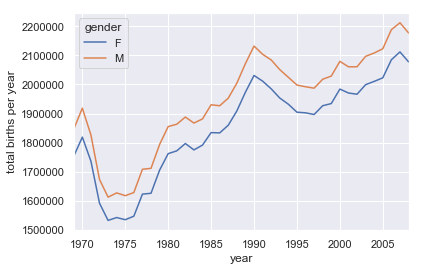

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles

births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

<img src='data/images/img47.PNG'>

### Masks ans Queries are explained well here:
https://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe

In [198]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

# query() filetrs out rows with births outside the sig area
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [199]:
# Create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

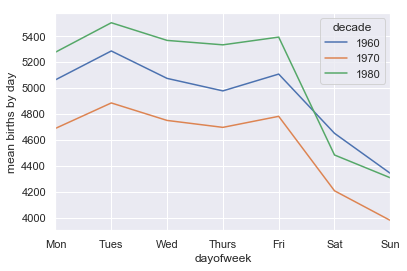

In [200]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

#T HIS chart shows that births are slightly less common on weekends 

## 9. Vectorized String Operations
---
for more info on pandas string manipulation go to docs:

[Visit Docs](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html )

<img src='data/images/img48.PNG'>

In [202]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

### Series

In [21]:
# Pandas has features to address mising values through methods
# here is a simple example using a pandas series along with a method

data = ['peter', 'Paul', 'MARY', 'gUIDO']
names = pd.Series(data)
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

In [22]:
#names.str.<TAB> #to see all optoins available to str
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [23]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [24]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [25]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [26]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [27]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

<img src='data/images/img50.PNG'>

In [28]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [29]:
# Find all the names that start and end with a consanant
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

<img src='data/images/img51.PNG'>

In [33]:
# Two ways to slice
monte.str.slice(0,3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [31]:
# Same as above
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [32]:
# Here split the strings and get last value (here last name)
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

## 10. Time Series Data
---
For more info on time-series data in pandas:

[Time Series Docs](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

<img src='data/images/img52.PNG'>

In [34]:
# datetime module built-in to Python

from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [35]:
# Numpy uses datetime64

import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [36]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

<img src='data/images/img53.PNG'>

<img src='data/images/img54.PNG'>

In [37]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

<img src='data/images/img55.PNG'>

In [38]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [39]:
# Pulling date range
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [40]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

<img src='data/images/img56.PNG'>

In [41]:
# Note here to_datetime parses many differing values to same date format
# Also note that since a series of data is passed in, DatetimeIndex returned

dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [42]:
# A DatetimeIndex can be converted to a PeriodIndex with to_period()
# here 'D' is the frequency used, which means days

dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [43]:
# TimedeltaIndex is created usually when calculations are perofmed between
# two or more time periods
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [44]:
# Date range with  two dates
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# Date range with start date and number of periods
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [46]:
# Date range with monthly frequency added in, (note last day of month)
pd.date_range('2015-07-03', periods=8, freq='M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [47]:
# Creating regular sequences of periods and timedelta values are similar
#note here monthly period range
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [48]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [50]:
# Some examples using stock data for AA (2 years of data)

data = pd.read_csv('data/AA_2018.csv')
data = data.set_index('date')
data.head()

,changePercent,close,high,low,open,volume,ticker
date,,,,,,,
2017-01-03,2.671,28.83,28.87,28.170,28.60,2746634,AA
2017-01-04,4.960,30.26,30.30,29.020,29.02,3339520,AA
2017-01-05,1.289,30.65,30.93,30.115,30.18,2444552,AA
2017-01-06,0.098,30.68,31.10,30.310,30.69,2086333,AA
2017-01-09,-3.911,29.48,30.88,29.215,30.88,4205059,AA


In [51]:
data.tail()

,changePercent,close,high,low,open,volume,ticker
date,,,,,,,
2019-04-01,4.616,29.46,29.67,28.53,28.68,3880402,AA
2019-04-02,-3.123,28.54,29.29,28.18,29.13,3838794,AA
2019-04-03,0.526,28.69,28.87,28.31,28.45,4678230,AA
2019-04-04,2.091,29.29,29.34,28.38,28.60,2654923,AA
2019-04-05,0.888,29.55,29.69,29.09,29.40,3018557,AA


In [52]:
# For simplicity, just going to use close price

aa = data['close']
aa.head()

date
2017-01-03    28.83
2017-01-04    30.26
2017-01-05    30.65
2017-01-06    30.68
2017-01-09    29.48
Name: close, dtype: float64

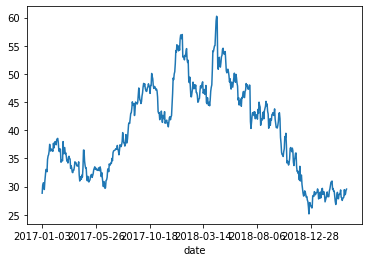

In [53]:
# Plotting works, x-axis dates are a mess
aa.plot()

In [55]:
# Note that entire data sets can be shifted to perform calcuations over time
# i.e. percent change, ROI, ect, shift() works in pandas, and roll() for numpy

data = pd.read_csv('data/AA_daily.csv')
data = data.set_index('date')
data

,changePercent,close,high,low,open,volume,ticker
date,,,,,,,
2019-05-30,-3.740,21.62,22.47,21.50,22.41,3409992,AA
2019-05-31,-1.989,21.19,21.37,21.02,21.26,2720980,AA
2019-06-03,1.510,21.51,21.67,20.82,21.05,3181047,AA
2019-06-04,1.767,21.89,22.23,21.48,21.67,3593527,AA
2019-06-05,-2.376,21.37,22.05,21.04,22.02,5820479,AA
2019-06-06,0.936,21.57,21.98,21.21,21.45,4244678,AA


In [56]:
close = data['close']
close

date
2019-05-30    21.62
2019-05-31    21.19
2019-06-03    21.51
2019-06-04    21.89
2019-06-05    21.37
2019-06-06    21.57
Name: close, dtype: float64

In [57]:
# Note that the shift means that initial entries will become nan 
# here is 1 day percent change
day1pctchg = 100 * (close / close.shift(1) - 1)
day1pctchg

date
2019-05-30         NaN
2019-05-31   -1.988899
2019-06-03    1.510146
2019-06-04    1.766620
2019-06-05   -2.375514
2019-06-06    0.935891
Name: close, dtype: float64

In [58]:
# Remove all NaN
day1pctchg.dropna()

date
2019-05-31   -1.988899
2019-06-03    1.510146
2019-06-04    1.766620
2019-06-05   -2.375514
2019-06-06    0.935891
Name: close, dtype: float64

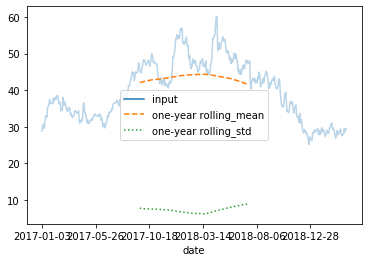

In [59]:
rolling = aa.rolling(365, center=True)

data = pd.DataFrame({'input': aa,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## 11. Working With Larger Data Sets
---

### eval()

In [207]:
# Pandas has some tools that allow direct access to C-speed operations 
# without costly allocation that intermediate arrays can cause

# Here are 4 semi-large dataframes with random data
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))
print(df1.head(1))

        0         1         2         3         4         5         6   \
0  0.37454  0.950714  0.731994  0.598658  0.156019  0.155995  0.058084   

         7         8         9   ...        90        91        92        93  \
0  0.866176  0.601115  0.708073  ...  0.119594  0.713245  0.760785  0.561277   

         94        95        96        97        98        99  
0  0.770967  0.493796  0.522733  0.427541  0.025419  0.107891  

[1 rows x 100 columns]


In [209]:
print(df2.head(1))

         0         1         2         3         4         5         6   \
0  0.926538  0.382461  0.871469  0.761471  0.328826  0.988821  0.120738   

         7         8         9   ...        90        91        92        93  \
0  0.358905  0.954462  0.004711  ...  0.310465  0.816988  0.930747  0.111477   

         94        95        96        97       98        99  
0  0.772517  0.801181  0.466825  0.005912  0.70511  0.487674  

[1 rows x 100 columns]


In [210]:
# Notice how long it takes to sum all four in pandas
%timeit df1 + df2 + df3 + df4

143 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [211]:
# Same operations using eval() is 50% faster than just using pandas
%timeit pd.eval('df1 + df2 + df3 + df4')

62.1 ms ± 681 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [214]:
# eval works with a wide range of operations, note the np.allclose()
# function simply compares the two variables to ensure exact same results/data

df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

# arithmetic
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [215]:
# comparison
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [216]:
# bitwise
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [217]:
# column-wise eval()
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [218]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [219]:
# eval allows for more succint code notice difference from result 2
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

In [222]:
# eval can be used to create new column from calculation results
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [223]:
# existing columns can also be modified
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


In [224]:
# DataFreame.query() method

# For comparison sake, 
# result1 = pandas, 
# result2 = pd.eval(), 
# result3 = pd.query()

result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

### query()

In [225]:
# Note that query() is more efficient and easier to understand than 
# using masking

result3 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result3)

True

<img src='data/images/img57.PNG'>

In [227]:
df.values.nbytes

32000

In [ ]:
# Bottom line, the difference between eval() and query() is negligable, 
# however, with large arrays/datasets either will perform better than 
# the traditional pandas df calculations. 